In [1]:
import numpy as np
import matplotlib.pyplot as plt


#loaded_data = np.load('results/data_line.npz')
#loaded_data = np.load('results/gsi_data.npz')
loaded_data = np.load('results/langzhou_data.npz')

#dp_p_list = loaded_data['dp_p_list']
delta    = loaded_data['delta']
state = loaded_data['state']
x = loaded_data['x']*1e3
time=loaded_data['time']
slip_factor=loaded_data['slip_factor']
s_per_turn=loaded_data['s_per_turn']


excited=state==2
delta_std = np.std(delta, axis=1)


exc0=excited[1,:]

fraction_excited=sum(exc0)/len(exc0)*100

fraction_excited=[]
for i in range(len(excited)):
    fraction_excited.append(100*sum(excited[i])/len(excited[i]))


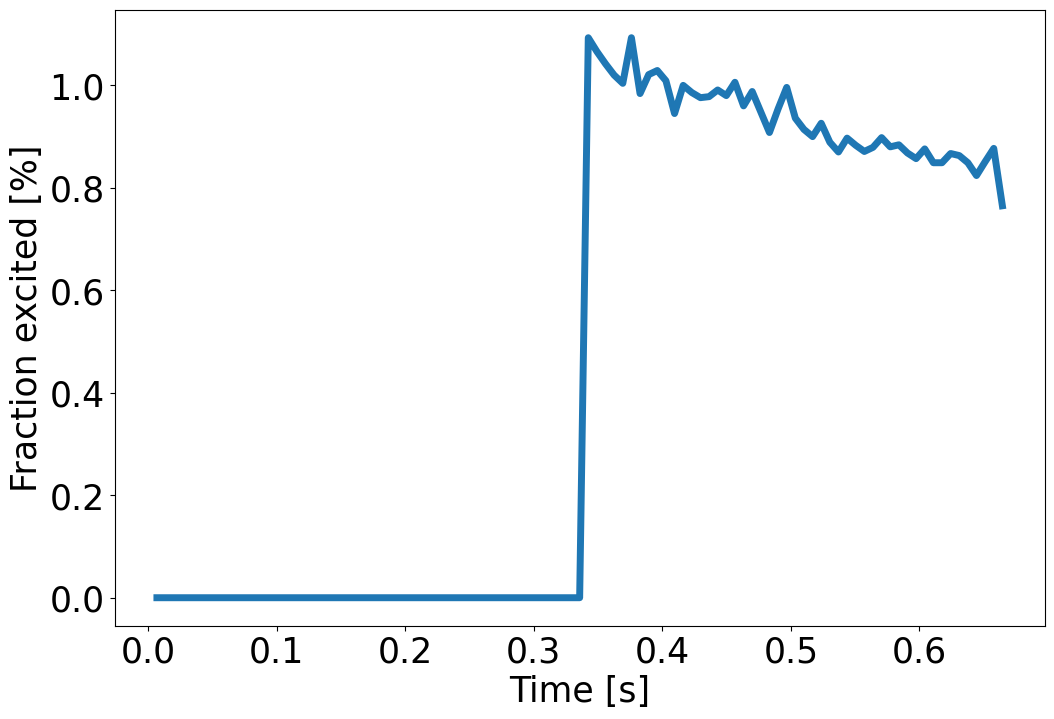

In [2]:
cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(time[1:],fraction_excited[1:], label=f'xsuite',color=cmap(0), linewidth=5.0)
plt.xlabel(r'Time [s]')
plt.ylabel(r'Fraction excited [%]')
#plt.legend()
# plt.savefig('ELENA:emittance_default_parameters.png', dpi=300)
# plt.savefig('ELENA:emittance_default_parameters.eps', dpi=300)
plt.show()

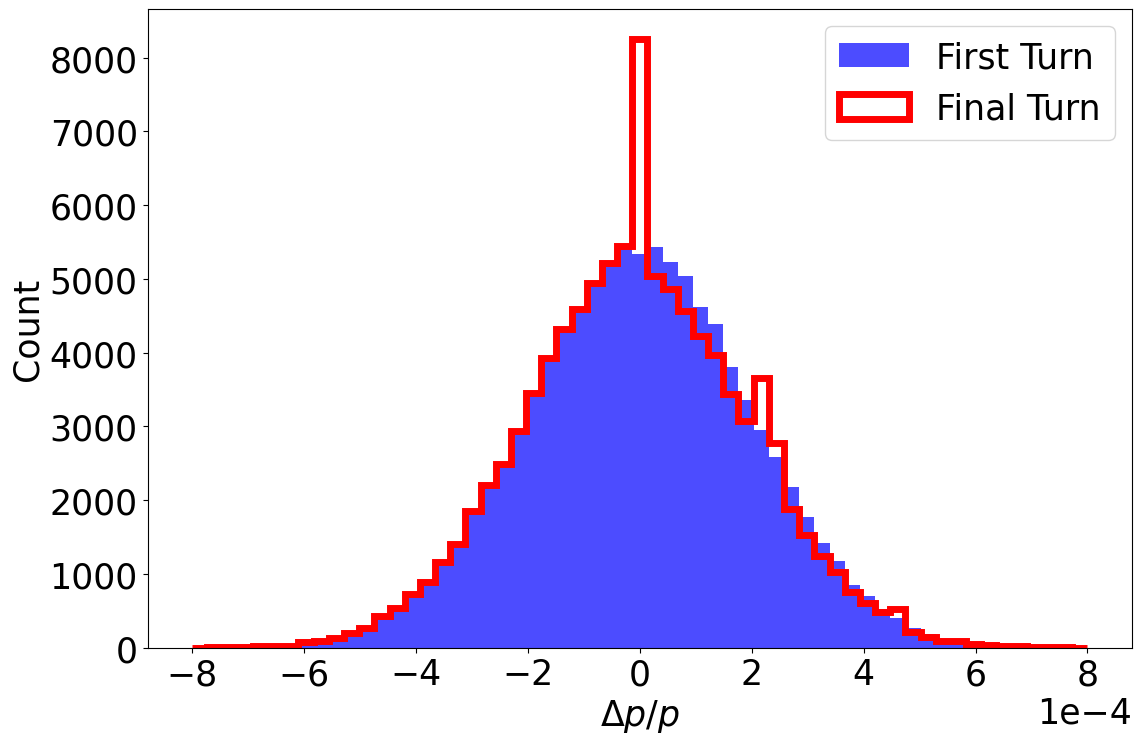

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Extract delta at the first turn (assuming the first turn is at index 0)
delta_first_turn = delta[0, :]

# Extract delta at the final turn
delta_final_turn = delta[-1, :]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot histograms for delta at the first and final turns
bins=np.linspace(-8e-4, 8e-4,60)
# plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn')
# plt.hist(delta_final_turn, bins=bins, color='darkorange', alpha=0.0, label='Final Turn')
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn',  linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)

plt.xlabel(r'$\Delta p/p$')


plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Histogram_comparison.eps', format='eps', dpi=300)
plt.show()


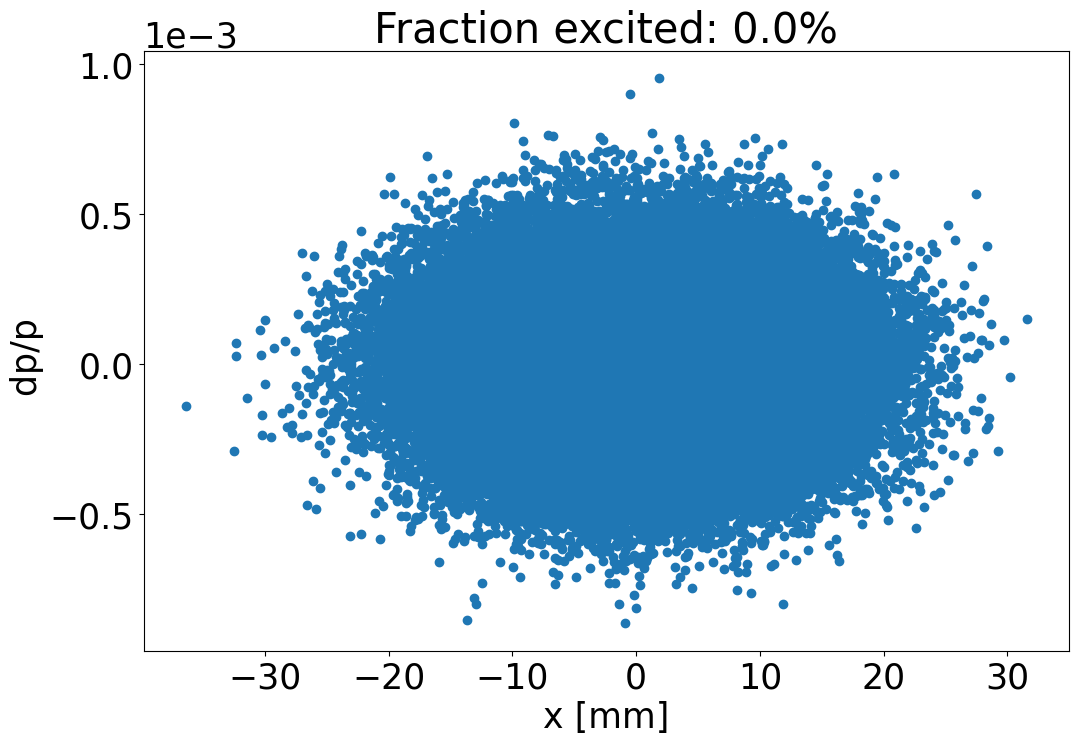

In [4]:
turn=1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
#plt.savefig('First_turn.eps', format='eps', dpi=300)
plt.show()

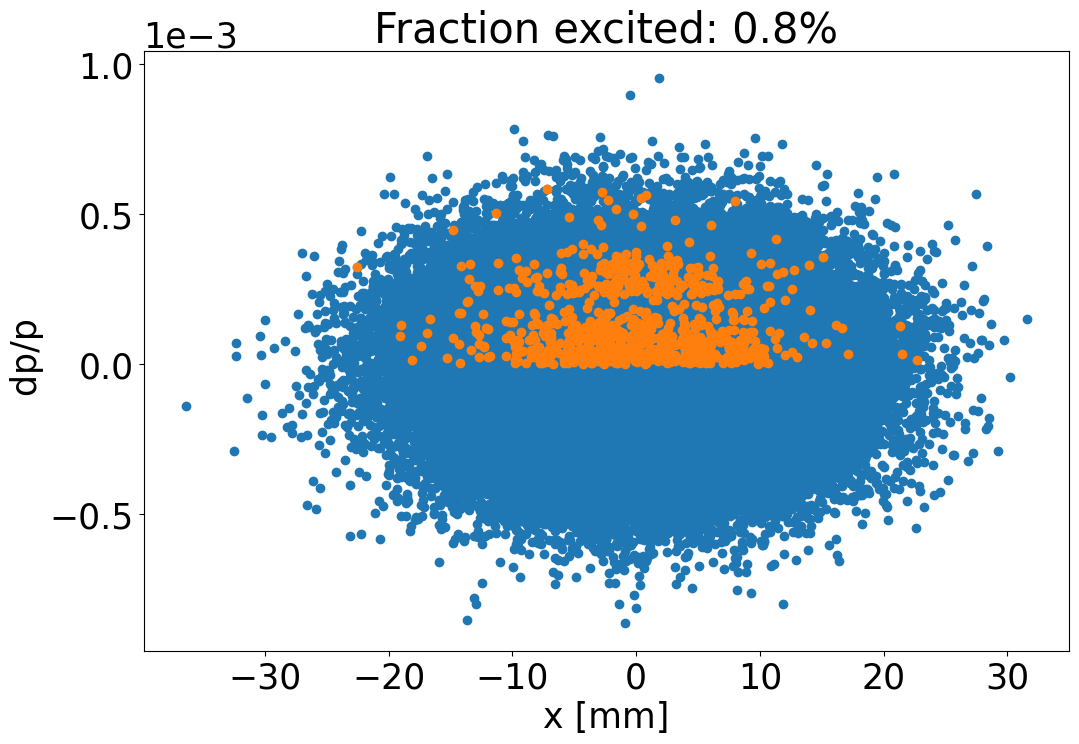

In [5]:
turn=-1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

In [6]:
# Note, within n*emittance, one have n_% of particles where
#  n=1; n_% = 39%
#  n=2; n_% = 63%
#  n=4; n_% = 87%
#  n=6; n_% = 95%
n_part = int(1e5)
sigma_dp = 2e-4 # relative ion momentum spread
# Let's consider 95% of particles, i.e. n=6 for transverse action, and n=2 for abs dp/p
n_bins = 100

# bins_x  = gemitt_x*np.linspace(0,7,n_bins+1)
# bins_y  = gemitt_y*np.linspace(0,7,n_bins+1)
bins_dp = sigma_dp*np.linspace(-0.5,0.5,n_bins+1)
# bins_dp = sigma_dp*np.linspace(-9.2*1e-5,,n_bins+1)
# hist_x  = bins_x[0:] + ( bins_x[1] -  bins_x[0])/2
# hist_y  = bins_y[0:] + ( bins_y[1] -  bins_y[0])/2
hist_dp = bins_dp[0:]+ (bins_dp[1] - bins_dp[0])/2
all_hist_x  = np.zeros((len(time), n_bins))
all_hist_y  = np.zeros((len(time), n_bins))
all_hist_dp = np.zeros((len(time), n_bins))
all_found_x = np.zeros((len(time)))
all_found_y = np.zeros((len(time)))
all_found_dp = np.zeros((len(time)))

for i_turn in np.arange(len(time)): 
    #all_hist_x[i_turn,:], _  = np.histogram(action_x[i_turn,:],      bins=bins_x,  density=False, weights=None)
    #all_hist_y[i_turn,:], _  = np.histogram(action_y[i_turn,:],      bins=bins_y,  density=False, weights=None)
    all_hist_dp[i_turn,:], _ = np.histogram((delta[i_turn,:]), bins=bins_dp, density=False, weights=None)

    # _aux = np.where(np.cumsum(all_hist_x[i_turn,:]/n_part) > 0.95)[0]
    # if len(_aux) > 0:
    #     all_found_x[i_turn] = hist_x[_aux[0]]
    # else:
    #     all_found_x[i_turn] = hist_x[-1]
    
    # _aux = np.where(np.cumsum(all_hist_y[i_turn,:]/n_part) > 0.95)[0]
    # if len(_aux) > 0:
    #     all_found_y[i_turn] = hist_y[_aux[0]]
    # else:
    #     all_found_y[i_turn] = hist_y[-1]

    _aux = np.where(np.cumsum(all_hist_dp[i_turn,:]/n_part) > 0.95)[0]
    if len(_aux) > 0:
        all_found_dp[i_turn] = hist_dp[_aux[0]]
    else:
        all_found_dp[i_turn] = hist_dp[-1]



def imagesc(im, x = None, y = None, **kwargs):
    """
    Wrapper for PyPlot's `imshow` to imitate Matlab-style IMAGESC.

    `imagesc(z; x, y)` treats `z` as a 2D array to visualize, with `x` giving pixel coordinates
    across a row and `y` giving pixel columns *down* a column.

    Omitting `x` and/or `y` implies `1:size(z, 2)` and `1:size(z, 1)` respectively.

    PyPlot will show the image using a carefully-constructed call to `PyPlot.imshow` where:
    - the extent is carefully initialized so the plot's ticks line up exactly with `x` and `y`
    - the origin is at the lower-left of the window
    - the aspect ratio is fluid (uses the full window)
    - no interpolation is applied.
    """
    if x is None:
        x = np.arange(np.shape(im)[1])
    if y is None:
        y = np.arange(np.shape(im)[0])

    def _extents(f):
        delta = f[2] - f[1]
        return [f[1] - delta / 2, f[-1] + delta / 2]
    plt.imshow(im, extent=(_extents(x)[0], _extents(x)[-1], _extents(y)[0],  _extents(y)[-1]), cmap = 'RdBu_r',aspect="auto", origin="lower", interpolation="none", **kwargs)

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})
# imagesc(np.log((all_hist_dp+1)/n_part).transpose(), time, hist_dp)
# plt.colorbar()
# plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.xlabel('Time [s]')
# plt.ylabel('dp/p')        

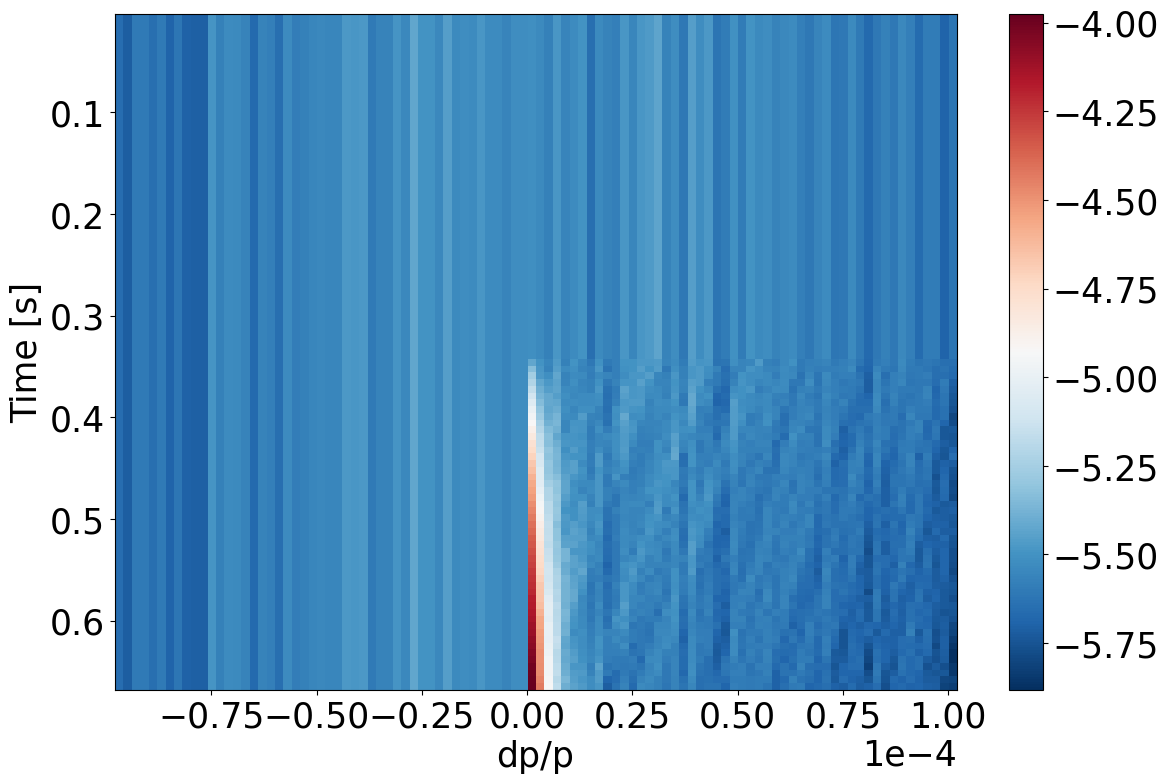

In [7]:

# Create the figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot the data on the primary y-axis
imagesc(np.log((all_hist_dp+1)/n_part), hist_dp, time)
plt.colorbar()
plt.tight_layout()

# Customize the primary y-axis and labels
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax1.set_xlabel('dp/p')
ax1.set_ylabel('Time [s]')

# Invert the y-axis
ax1.invert_yaxis()

plt.show()

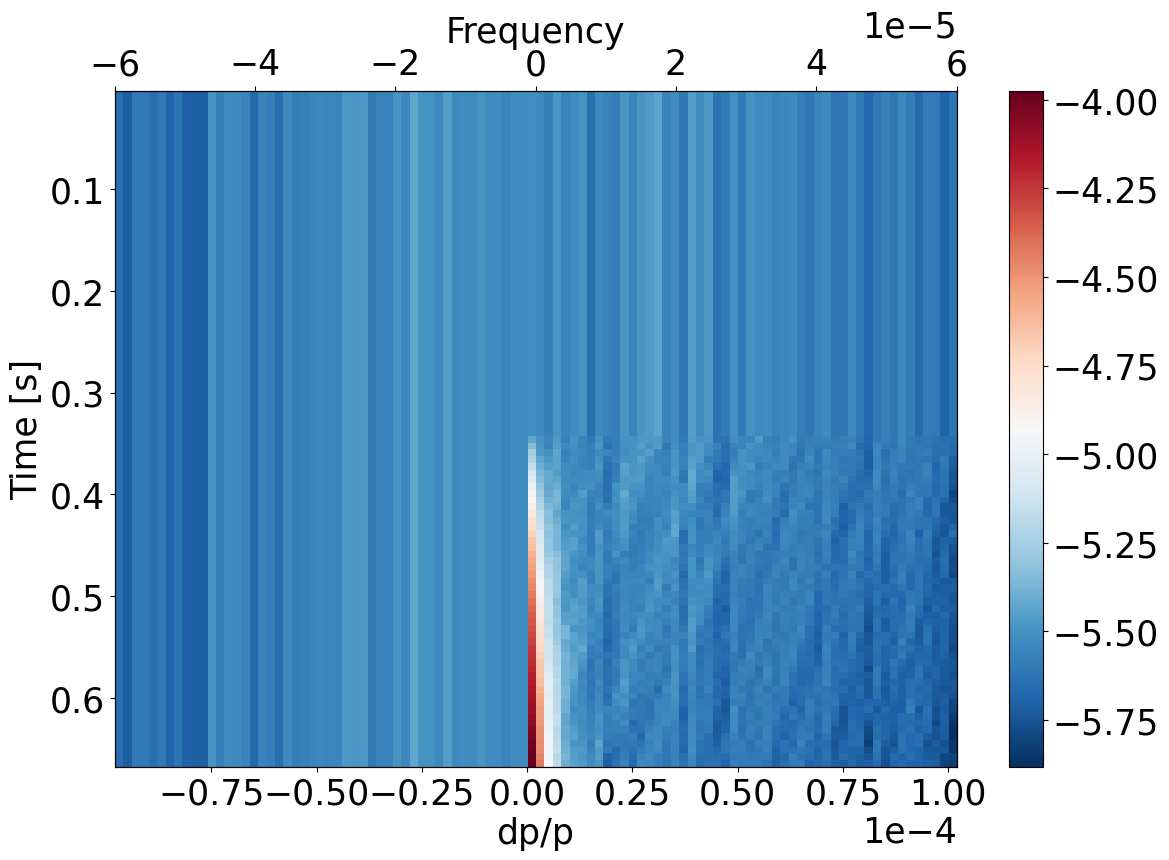

In [8]:
slip_factor = 0.45
s_per_turn = 6.71297741586281e-07
frequency0 = 1 / s_per_turn
frequency_subtract=242.171*1e6*0

# Reverse the time array
reversed_time = time[::-1]

# Create the figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot the data on the primary y-axis
imagesc(np.log((all_hist_dp+1)/n_part), hist_dp, time)
plt.colorbar()
plt.tight_layout()

# Customize the primary y-axis and labels
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax1.set_xlabel('dp/p')
ax1.set_ylabel('Time [s]')

# Create a secondary x-axis at the top
ax2 = ax1.twiny()

# Customize the secondary x-axis limits
dp_min = ax1.get_xlim()[0]
dp_max = ax1.get_xlim()[1]

# Function to convert scaled dp/p to dp/p
def scaled_dp_to_dp(scaled_dp):
    return (scaled_dp * slip_factor )-frequency_subtract

scaled_dp_min = scaled_dp_to_dp(dp_min)
scaled_dp_max = scaled_dp_to_dp(dp_max)
ax2.set_xlim(scaled_dp_min, scaled_dp_max)



# Calculate the tick positions for the secondary x-axis
scaled_dp_ticks = ax2.get_xticks()
dp_ticks = [scaled_dp_to_dp(scaled_dp) for scaled_dp in scaled_dp_ticks]

# Set the tick positions and labels for the secondary x-axis
ax2.set_xticks(scaled_dp_ticks)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax2.set_xlabel(f'Frequency')

ax1.invert_yaxis()
plt.show()
